# Exercise 9 -Path Planning

## 9.1 Greedy Uninformed Search [6.0]

In this exercise, you will implement a greedy uninformed search algorithm to find the shortest path from a start to a goal location.

The input to the search is:
- the map of the environment $\mathbf{M}$
- the start position $\mathbf{x}_{start}$
- the goal position $\mathbf{x}_{goal}$

The output is the sequence of positions $(x,y)$ from the start to the goal.

At each step, the robot is allowed to move from one cell to one of the 8 neighboring cells.

This search algorithm is similar to A* but does not use any heuristic to guide the search.
Therefore, the cost of each step of the search is defined only by $g(\mathbf{x})$, which is the 'actual' cost from $\mathbf{x}_{start}$ to $\mathbf{x}$. 

Implement the `plan_path_uninformed` function and verify that it is correct for some test input.

**Hints:**
- Use the available function `is_valid` to select only the cells that belong to the free space.
- I'm modifying the `is_valid` function to also check for the expansion cell being withing map boundries.
- Assume for now that each movement has the same cost.

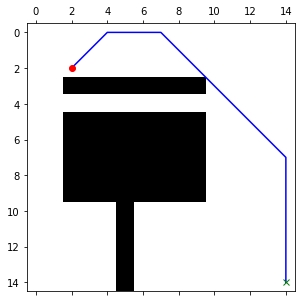

In [1]:
# For a toy example we assume that going diagonally has the same weight as going up or down
# Then let's just assign a cost of 0 to each movement
import numpy as np
import ex9 as ex
import matplotlib.pyplot as plt

# test example
M = np.ones([15,15])
M[3,2:10] = 0
M[5,7:10] = 0
M[5:10,2:10] = 0
M[5:15,5] = 0
x_start = np.array([2,2])
x_goal = np.array([14,14])

path, visited = ex.plan_path_uninformed(x_start, x_goal, M)
ex.plot_path(np.asarray(path), x_start, x_goal, M)

Visited points in orange

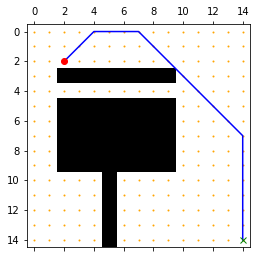

In [2]:
ex.plot_path_and_visited(np.asarray(path), visited, x_start, x_goal, M, visit_step=1)

## 9.2 Greedy Uninformed Planning [4.0]

Use `plan_path_uninformed` to plan a path from start to goal in the following scenario.

Plot the resulting path with the available function `plot_path`.

Print the lenght of the path and the number of nodes explored to find the goal.


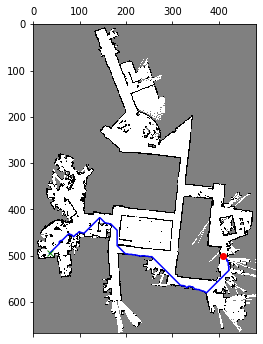

length of path = 457


In [3]:
%matplotlib inline
import ex9 as ex
import matplotlib.image as mpimg
import numpy as np

M = mpimg.imread('Map.png')

x_start = np.array([500, 410])
x_goal = np.array([495, 35])

path, visited = ex.plan_path_uninformed(x_start, x_goal, M)

# use plot path to show the path
ex.plot_path(np.asarray(path), x_start, x_goal, M)

# print the length of the path and the number of nodes explored
print("length of path =", len(path))

The figure below is a sparse selection (a sanple set with constant step 50) of the visited points. The algorithm is all over the place. visited points are shown in orange.

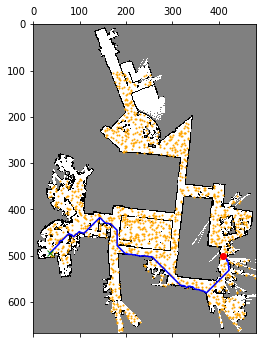

In [4]:
ex.plot_path_and_visited(np.asarray(path), visited, x_start, x_goal, M)

## 9.3 A* algorithm [6.0]

Implement A* algorithm by adding an heuristic to the `plan_path_uninformed` algorithm to inform and speed up the search.

Use the (straight-line) Euclidean distance to the goal as a heuristic function.

Implement `plan_path_astar` and verify that it is correct.

Since we're not told anything about the cumulative costs, i.e. edge weights, we're going to set them all equal to one.
Just like Sebastian Thrun's implementation, I'll represent each point via its f and g values and its coordinates.

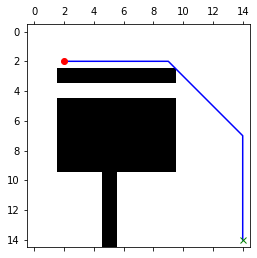

length of path = 20


In [5]:
import numpy as np
import ex9 as ex
import matplotlib.pyplot as plt

# test example
M = np.ones([15,15])
M[3,2:10] = 0
M[5,7:10] = 0
M[5:10,2:10] = 0
M[5:15,5] = 0
x_start = np.array([2,2])
x_goal = np.array([14,14])

path, visited = ex.plan_path_astar(x_start, x_goal, M)

# show your results as in the previous exercise
ex.plot_path(np.asarray(path), x_start, x_goal, M)
print("length of path =", len(path))


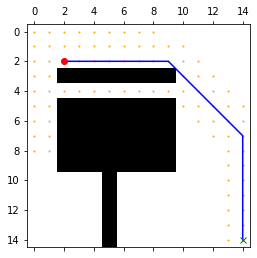

In [6]:
ex.plot_path_and_visited(np.asarray(path), visited, x_start, x_goal, M, visit_step=1)

## 9.4 A* planning [4.0]

Use `plan_path_astar` to plan a path from start to goal in the previous scenario.

Plot the resulting path with the available function `plot_path`.

Print the lenght of the path and the number of nodes explored to find the goal.

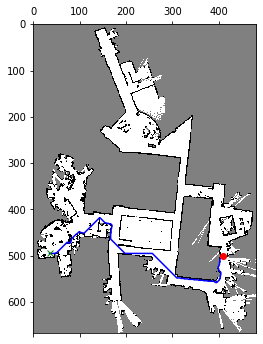

length of path = 459


In [7]:
import numpy as np
import ex9 as ex
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

M = mpimg.imread('Map.png')
x_start = np.array([500, 410])
x_goal = np.array([495, 35])

path, visited = ex.plan_path_astar(x_start, x_goal, M)

# show your results as in the previous exercise
ex.plot_path(np.asarray(path), x_start, x_goal, M)
print("length of path =", len(path))

Uninformed search took 1.60 s to run while A* took 1.0 s. Both algorithms have path segments that are adjacent to the walls/obstacles (occupied space). This can be potentially addressed via gaussian smoothing of the occupancy grid maps.
The figure below roughly demonstrates why the A* took much less time. It shows a sparse selection of the visited points. They are mostly in approximity of the shortest path. In other words, the algorith has wandered mush less than the uninformed search.

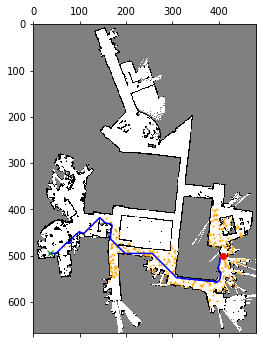

In [8]:
ex.plot_path_and_visited(np.asarray(path), visited, x_start, x_goal, M)